<Figure size 480x480 with 0 Axes>

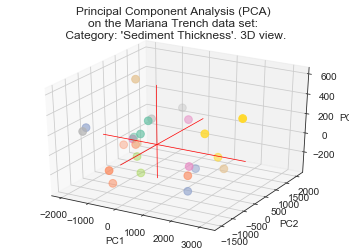

In [17]:
# libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import seaborn as sns
import os

# Get the dataset
os.chdir('/Users/pauline/Documents/Python')
df = pd.read_csv("Tab-Morph.csv")
#dfB.head(5)

sns.set_style("white")

my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Keep the 'specie' column appart + make it numeric for coloring
df['sedim_thick']=pd.Categorical(df['sedim_thick'])
my_color=df['sedim_thick'].cat.codes
df = df.drop('sedim_thick', 1)

# Run The PCA
pca = PCA(n_components=3)
pca.fit(df)

# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(3)], index=df.index)

# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)

# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r', linewidth=0.7)
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r', linewidth=0.7)
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r', linewidth=0.7)

# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Principal Component Analysis (PCA) \non the Mariana Trench data set: \n Category: 'Sediment Thickness'. 3D view.")
plt.show()
